In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
def phi(x, deg):
    p = np.zeros((deg+1,len(x)))

    for i in range(deg+1):
        p[i] = np.power(x,i)

    return p


def GP(x_pred,data,deg=0,sigma=0.05):
    X = data[0]
    y = data[1]

    phi_X = phi(X,deg)
    phi_pred = phi(x_pred,deg)

    A_inv = np.linalg.inv(1/sigma**2 * (phi_X @ phi_X.T) + np.eye(deg+1))

    mean = 1/sigma**2 * phi_pred.T @ A_inv @ phi_X @ y
    cov = phi_pred.T @ A_inv @ phi_pred

    w_bar = 1/sigma**2 * (A_inv @ phi_X) @ y.T

    return w_bar, A_inv, mean, cov

data = np.array([[-2, -1, 0, 1, 2],
                 [-1, -0.2, 0.2, 0.1, 0.5]])

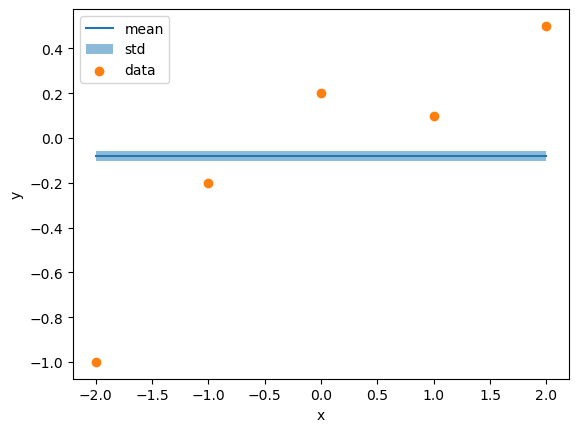

In [3]:
new_x = np.linspace(-2,2,100)

post_mean, post_cov, pred_mean, pred_cov = GP(new_x,data,0)

plt.plot(new_x,pred_mean, label = 'mean')
std = np.sqrt(np.diag(pred_cov))
plt.fill_between(new_x,pred_mean-std, pred_mean+std, alpha = 0.5, label = 'std')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0],data[1], label ='data')
plt.legend()

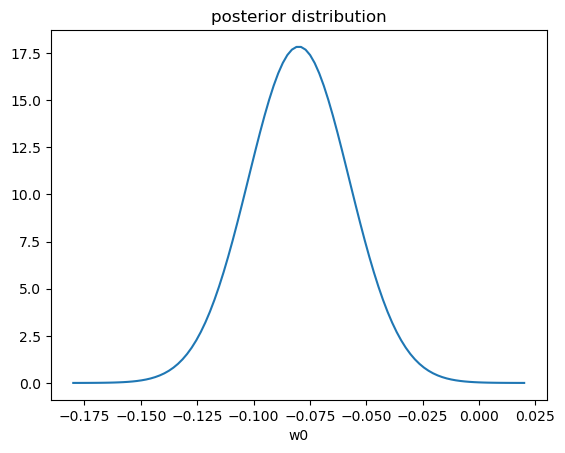

In [4]:
x_pdf = np.linspace(post_mean-0.1,post_mean+0.1,100)
pdf_values = multivariate_normal.pdf(x_pdf, post_mean, post_cov)
plt.title('posterior distribution')
plt.xlabel('w0')
plt.plot(x_pdf,pdf_values)

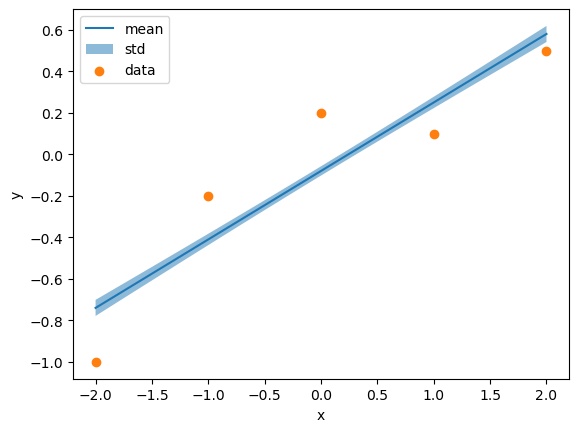

In [5]:
post_mean, post_cov, pred_mean, pred_cov = GP(new_x,data,1)

plt.plot(new_x,pred_mean, label = 'mean')
std = np.sqrt(np.diag(pred_cov))
plt.fill_between(new_x,pred_mean-std, pred_mean+std, alpha = 0.5, label ='std')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0],data[1], label ='data')
plt.legend()

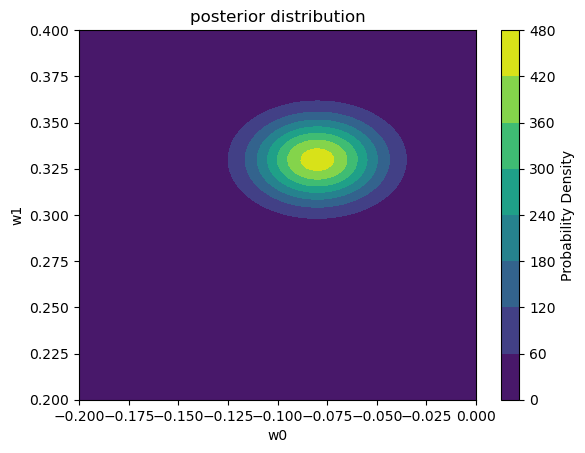

In [6]:
x, y = np.meshgrid(np.linspace(-0.2, 0, 100), np.linspace(0.2, 0.4, 100))
xy = np.column_stack([x.ravel(), y.ravel()])

# Evaluate the PDF at each point in the grid
pdf_values = multivariate_normal.pdf(xy, post_mean, post_cov)

# Reshape the PDF values to match the shape of the input grid
pdf_values = pdf_values.reshape(100, 100)

# Plot the PDF as a contour plot
plt.contourf(x, y, pdf_values, cmap='viridis')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('posterior distribution')
plt.colorbar(label='Probability Density')

# Show the plot
plt.show()

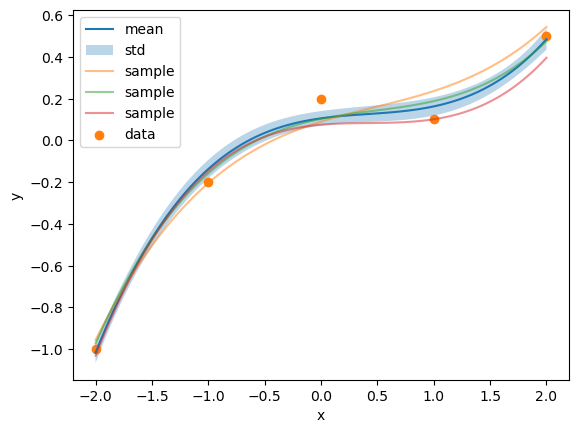

In [7]:
degree = 3

post_mean, post_cov, pred_mean, pred_cov = GP(new_x,data,degree)
plt.plot(new_x,pred_mean, label= 'mean')

std = np.sqrt(np.diag(pred_cov))
plt.fill_between(new_x,pred_mean-std, pred_mean+std, alpha = 0.3, label ='std')

a = 0.5
plt.plot(new_x,np.random.multivariate_normal(pred_mean, pred_cov), alpha = a, label = 'sample')
plt.plot(new_x,np.random.multivariate_normal(pred_mean, pred_cov), alpha = a, label = 'sample')
plt.plot(new_x,np.random.multivariate_normal(pred_mean, pred_cov), alpha = a, label = 'sample')


plt.scatter(data[0],data[1], label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
